Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material_TPs/TP3/images a partir del template Material_TPs/TP3/template

1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos
3. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi.png con el mismo témplate del ítem 1
4. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.
5. Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import numpy as np
import cv2

template = cv2.imread('./TP3/template/pattern.png',cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread('./TP3/images/coca_logo_1.png',cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./TP3/images/COCA-COLA-LOGO.jpg',cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('./TP3/images/coca_logo_2.png',cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread('./TP3/images/coca_multi.png',cv2.IMREAD_GRAYSCALE)
img5 = cv2.imread('./TP3/images/coca_retro_1.png',cv2.IMREAD_GRAYSCALE)
img6 = cv2.imread('./TP3/images/coca_retro_2.png',cv2.IMREAD_GRAYSCALE)
img7 = cv2.imread('./TP3/images/logo_1.png',cv2.IMREAD_GRAYSCALE)



In [12]:
def match_template_with_orb(template, img3):
    # Initiate ORB detector
    orb = cv2.ORB_create()

    # Find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(template, None)
    kp2, des2 = orb.detectAndCompute(img3, None)

    # Perform brute-force matching
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    # Sort the matches by distance
    matches = sorted(matches, key=lambda x: x.distance)

    # 25 matches with bounding boxes and confidence level
    img_matches = cv2.drawMatches(
        template, kp1, img3, kp2, matches[:25], None,
        flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

    for match in matches[:25]:
        (x1, y1) = kp1[match.queryIdx].pt
        (x2, y2) = kp2[match.trainIdx].pt

        cv2.rectangle(img_matches, (int(x1)-10, int(y1)-10), (int(x1)+10, int(y1)+10), (0, 255, 0), 2)
        cv2.rectangle(img_matches, (int(x2)-10, int(y2)-10), (int(x2)+10, int(y2)+10), (0, 255, 0), 2)

        cv2.putText(img_matches, "{:.2f}".format(match.distance), (int(x1), int(y1)-20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        cv2.putText(img_matches, "{:.2f}".format(match.distance), (int(x2), int(y2)-20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
    plt.show()

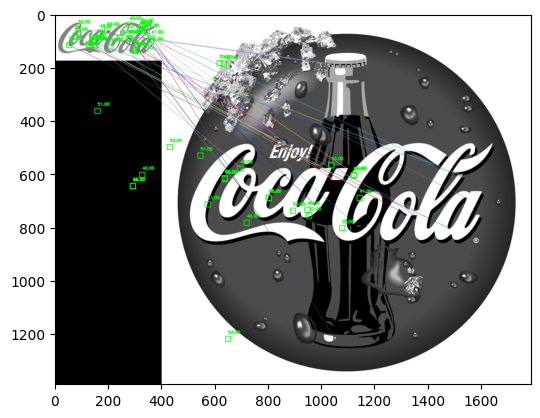

In [19]:
match_template_with_orb(template, img2)
